<a href="https://colab.research.google.com/github/duongnhathuy/A_I/blob/main/FaceID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#create model
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FaceID/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/FaceID/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_set.class_indices

In [ ]:
history = model.fit(training_set,epochs = 20,validation_data=test_set,verbose = 1)

In [ ]:
model.save('FaceID.h5')

In [ ]:
# draw learning process
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

1/1 [==============================] - 0s 42ms/step
Minh Quân


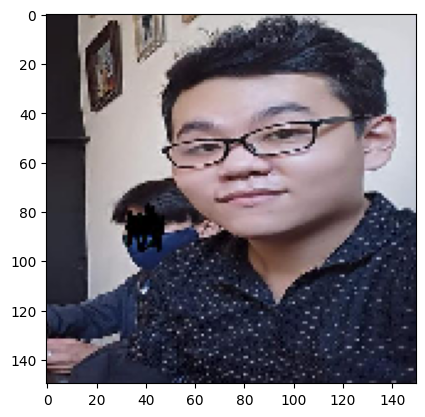

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/FaceID/Test/quan.jpeg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Minh Quân")
if(kq==1):
    print("Nhật Huy")
if(kq==2):
    print("Thế Kiệt")

1/1 [==============================] - 0s 193ms/step
Nhật Huy


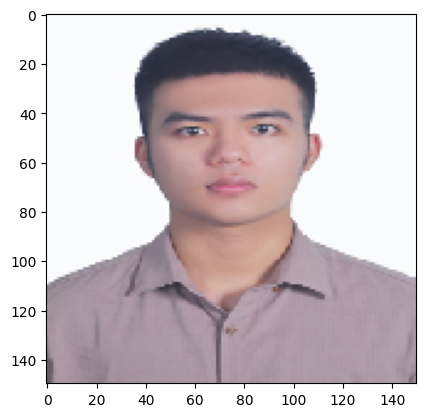

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/FaceID/Test/anhthe.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
kq=np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Minh Quân")
if(kq==1):
    print("Nhật Huy")
if(kq==2):
    print("Thế Kiệt")